<a href="https://colab.research.google.com/github/seohyeon-jeong/basic_machinelearning/blob/main/SMD_BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### k-최근접 이웃 방법을 활용한 이진분류 문제 

In [ ]:
# 도미의 길이와 무게 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

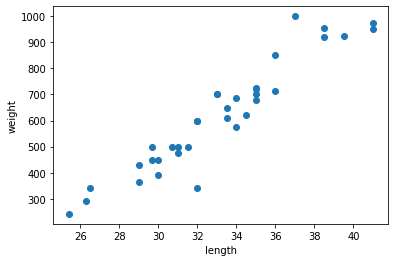

In [ ]:
# pyplot : 과학 계산용 그래프를 그리는 대표적인 패캐지 
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # plt.xlabel() : x축 이름 정의
plt.ylabel('weight') # plt.ylabel() : y축 이름 정의
plt.show() # 준비된 그래프를 화면에 출력

In [ ]:
# 빙어의 무게와 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

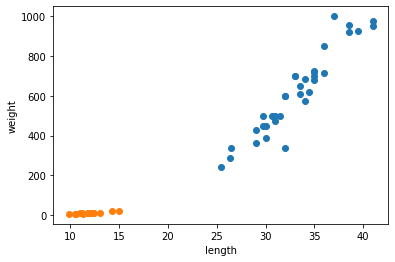

In [ ]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight) # 연속해서 plt.scatter()을 써주는 것만으로도 두개의 산점도가 같이 표기된다
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 두 리스트를 합치기 : 리스트 + 리스트
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 사이킷런을 사용하려면 2차원 리스트의 형태여야 한다.
# 일차원 리스트를 2차원 리스트로 변경 => zip()함수 와 리스트의 내포list comprehension 사용
fish_data = [[l,w] for l, w in zip(length, weight)] # zip() : 나열된 리스트에서 원소를 하나씩 꺼내주는 역할을 한다. 
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 머신러닝을 정답데이터가 필요하다. 그래야 기계가 이진분류를 위해 분류의 기준을 학습하니까
fish_target = [1]*35 + [0]*14 # 찾으려는 대상인 도미 : 1
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# K-Nearest Neighbors K-최근접 이웃 알고리즘을 구현하기 위해 클래스 import
from sklearn.neighbors import KNeighborsClassifier # 패캐지나 모듈 전체를 임포트 하지 않고 특정 클래스만 임포트 하려면 from...import로 사용한다.

# import sklearn
# model = sklearn.neighbors.KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier() # 임포트한 KNeighborsClassifier 클래스의 객체를 먼저 만든다

In [ ]:
# 객체에 fish_data와 fish_target을 전달하여 도미를 찾기 위한 기준을 학습시킨다. -> Training
# 훈련 : 모델에 데이터를 전달하여 규칙을 학습시키는 과정 
# 모델 : 머신러닝 알고리즘을 구현한 프로그램이나 알고리즘을 구체화해서 표현한 것

# fit(training data, target data) : 모델을 훈련시키는 과정 
kn.fit(fish_data, fish_target) # KNeighborsClassifier Class의 "_fit_X속성"에 fish_data, "_y속성"에 fish_target

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# score() : 모델을 평가하는 함수
kn.score(fish_data, fish_target) # score()함수의 출력값을 Accuracy 정확도 라고 한다

1.0

* k-Nearest Neighbors Algorithm  
 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터(참고 데이터 개수:k개, 디폴트는 5개)를 참고하여 다수를 차지하는 것을 정답으로 사용  
 단점) 데이터가 아주 많은 경우에는 메모리가 많이 필요하고 직선거리 계산하는데 많은 시간이 소요

In [ ]:
# predict(new;test data) : 새로운 데이터의 정답 예측
kn.predict([[30,600]])

array([1])

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# 참고데이터를 49개로 한 kn49모델
kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
# 직선거리가 가장 짧은 참고 데이터 49개중에 35개가 도미고, 빙어가 14개

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143


In [ ]:
# 기본값 5부터 49까지 중에서 score()가 1.0이하로 내려가는 이웃의 개수 구하기
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score < 1:
    print(n)
    break



18


### 훈련 세트와 테스트 세트  
* 머신러닝 알고리즘의 성능을 제대로 평가하기 위해서 훈련 데이터train set와 평가 데이터test set을 별도로 두어야 한다. 
  
* 지도학습 Supervised Learning  
 - 입력(데이터)와 타깃(정답)으로 이루어진 훈련데이터가 필요하다.
 - 입력 데이터의 유형 -> 특성feature

* 비지도학습 UnSupervised Learning
 - 타깃 없이 입력데이터만 사용한다. 


In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 샘플sample
fish_target = [1]*35 + [0]*14 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 샘플링의 편향 Sampling bias
train_input = fish_data[:35] # 인덱스를 지정해서 슬라이싱 (인덱스가 0~34인 원소 => 여기선 앞에서부터 35개 )
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target) # -> Sampling bias

0.0

* Numpy : 파이썬의 대표적인 배열 라이브러리, 다차원 표현에 특화

In [ ]:
import numpy as np

input_arr = np.array(fish_data) # input_arr에 input data(fish_data~length, weight)를 넣는다 
target_arr = np.array(fish_target) # target_arr에 target data(fish_target)를 넣는다

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
# np.shape : sample의 수, 특성 수 출력
print(input_arr.shape)

(49, 2)


In [ ]:
# 랜덤하게 데이터를 고르는데, input_arr와 target_arr가 같은 위치에서 함께 선택되게끔 해야 한다
# -> 인덱스를 섞은 후, input_arr와 target_arr에서 샘플 선택

# np.random.seed(숫자) : np를 랜덤하게 만드는데 seed를 지정
np.random.seed(42)

# np.range(N) : 0부터 N-1까지 1씩 증가하는 넘파이 배열을 할당 
index = np.arange(49)

# np.random.shuffle() : # random하게 index라는 이름의 배열 안의 값을 섞는다 
np.random.shuffle(index) 

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# 배열인덱싱array indexing : 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소 선택

# 랜덤하게 섞인 인덱스를 사용해 훈련 세트와 테스트 세트로 나누기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [ ]:
# 기존의 입력데이터를 값을 순서대로 넣은 input_array에서 [13]번째 값 = input_arr에서 셔플한 인덱스를 할당한 train_input의 [0]번째 값
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


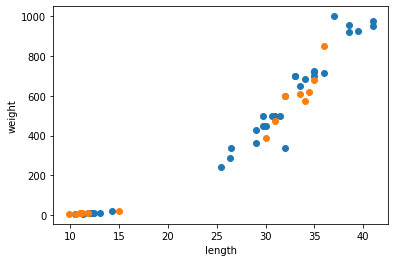

In [ ]:
import matplotlib.pyplot as plt

# 2차원 배열은 행과 열 인덱스를 콤마(,)로 나누어 지정합니다. 슬라이싱 연산자로 처음부터 마지막 원소까지 모두 선태하는 경우 시작과 종료 인덱스를 모두 생략할 수 있습니다.”
# 2차원 배열은 행과 열의 인덱스를 따로 지정해야 합니다. 이 때 콤마를 사용하여 구분합니다.
# 또 슬라이싱 연산자를 사용할 때 맨 처음 인덱스와 마지막 인덱스를 지칭할 때는 생략할 수 있습니다. 따라서 그냥 : 만 사용하면 모든 인덱스를 선택하는 셈이고 train_input[:, 0]은 모든 행의 첫 번째 열을 선택하게 됩니다!

plt.scatter(train_input[:,0],train_input[:,1]) # train_input[:,0] -> 2차원 넘파이에서 axis0의 값은 전부 axis1에서는 0번째 인덱스의 값만 가져오겠다. 
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

# 모델 훈련
kn = kn.fit(train_input, train_target)

# 모델 테스트
kn.score(test_input, test_target)

1.0

In [ ]:
# 예측 함수로 테스트 세트의 예측 결과과 실제 타깃 확인
kn.predict(test_input) # predict() 메서드가 반환하는건 넘파이배열!, 사이킷런의 모델의 입력과 출력은 모두 넘파이배열

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### 데이터의 전처리 (including 특성의 스케일 변화)

올바른 결과 도출을 위해서 데이터 전처리 과정을 거친다

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

# np.column_stack() : 전달받은 리스트를 일렬로 세운 다음 (= 하나의 column의 데이터로! n*1) 차례대로 연결, 연결할 리스트는 튜플로 전달
  # 튜플 : 리스트와 아주 비슷하지만, 한번 만들어진 튜플은 수정 불가 -> 매개변수 값으로 많이 사용
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
# 넘파이를 이용한 데이터 합치기
fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# np.ones(), np.zeros()를 이용해 타깃 데이터 만들기

# np.concatenate() : 전달받은 리스트를 옆으로 붙임 (= 1*n의 형식으로)
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# 사이킷런으로 훈련세트와 테스트 세트 나누기

# train_test_split() : 전달되는 리스트나 배열를 shuffle해서 비율에 맞게 훈련 세트와 테스트 세트를 나누어준다.
from sklearn.model_selection import train_test_split

# 테스트세트 비율 : default = 25%, test_size 매개변수에서 지정할 수 있다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape) # 2차원 배열, rows=데이터 개수가 36, 13

(36, 2) (13, 2)


In [ ]:
print(train_target.shape, test_target.shape) # 1차원 배열, rows개수가 36, 13

(36,) (13,)


In [ ]:
print(test_target)
# 원래의 도미와 빙어의 비율은 2.5:1인데 현재는 3.3:1 -> 샘플링의 편향이 발생 
# 무작위로 데이터 나눌 때 샘플이 골고루 섞이지 않을 수 있다. 특히, 일부 클래스의 개수가 적을 때 이런 현상이 발생할 수 있음

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# train_test_split()함수에 stratify 매개변수에 타깃데이터 전달 -> 클래스에 맞게 데이터를 나눈다. 
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


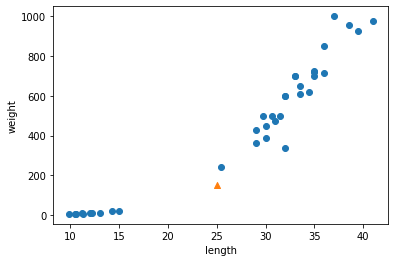

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^') # [25,150]의 값을 가지는 데이터에 marker 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 결과) 삼각형 데이터는 분명 도미데이터에 가까운데 왜 빙어로 결과가 나오는걸까??

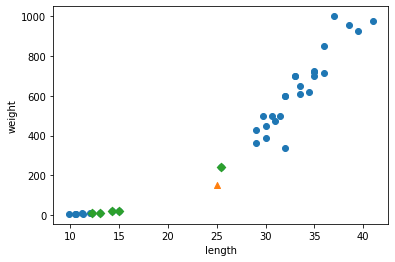

In [ ]:
# K-최근접 이웃 : 주변의 샘플 중에서 다수인 클래스를 예측으로 사용

# kn.kneighbors() : 이웃끼리의 거리, 이웃 샘플의 인덱스 반환 (n_neighbors의 기본값이 5이므로 기본 5개 이웃 반환)
  # return_distance = FALSE -> 이웃 샘플의 인덱스만 반환. 기본값은 TRUE
distances, indexes = kn.kneighbors([[25, 150]]) 

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D') # marker = 'D' : 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 결과) k=5로 두고 k-NN을 사용하면 도미 클래스 데이터는 하나밖에 포함이 안된다.

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)
# 그래프의 비율이 이상하다. 분명 도미랑은 엄청 가까운데 92고 그보다 몇배는 멀리 있는 것처럼 보이는 빙어들과의 길이는 130, 138정도로 밖에 안나온다
# -> x축의 범위가 좁고, y축은 범위가 넓어서 y축으로 조금만 멀어져도 거리가 아주 큰값으로 계산되는것!

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


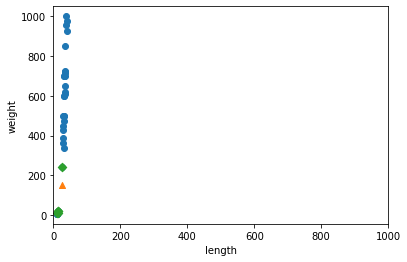

In [ ]:
# 산점도를 동일한 스케일의 차트로 그려보자(x, y축을 동일한 범위로 맞추기)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 두 특성의 스케일Scale이 다르면 알고리즘을 올바르게 예측할 수 없다. 특히나 거리기반 알고리즘의 경우! -> 데이터 전처리data preprocessing

# 표준점수Standard score (=Z점수) : 각 특성값이 0(원점)에서 표준편차의 명 배만큼 떨어져 있는지를 나타낸다
  # 분산 = 데이터에서 평균을 뺀 값을 모두 제곱한 뒤 평균을 내어 구한다. 
  # 표준편차 = 분산의 제곱근, 데이터가 분산된 정도

# 특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 한다. 
# axis = 0 : 행을 따라 각 열의 통계 값을 계산한다
mean = np.mean(train_input, axis=0) 
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
# 표준점수
  # 넘파이의 브로드캐스팅 : 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능
  # 모든 행에서 mean에 있는 두 평균값을 빼주고, 그다음 std에 있는 두 표준편차를 다시 모든 행에 적용
train_scaled = (train_input - mean)/std 
test_scaled = (test_input - mean)/std # 테스트 세트는 반드시 훈련 데이터의 통계값으로 정규화해야 한다. 그렇지 않으면 훈련세트에서 학습한 모델이 테스트 세트에서 올바르게 작동되지 않는다.

print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


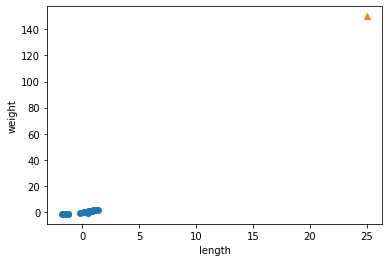

In [ ]:
# 전처리 데이터로 모델 훈련하기
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^') # 이건 아직 정규화 안해줌 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

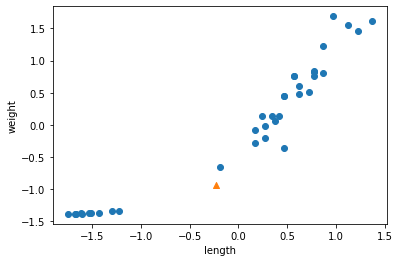

In [ ]:
new = ([25, 150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 결과) 데이터가 정규화되어서 각 특성 축의 범위가 -1.5 ~ 1.5 사이의 값을 가지게 되었다

In [ ]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new])) # new = ([25, 150]-mean)/std

[1.]


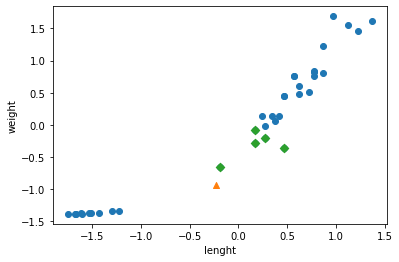

In [ ]:
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^') # plt.scatter(25, 150, marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()